# Try of Exchange Rate Forecasting Using ARIMA

<Axes: xlabel='Month'>

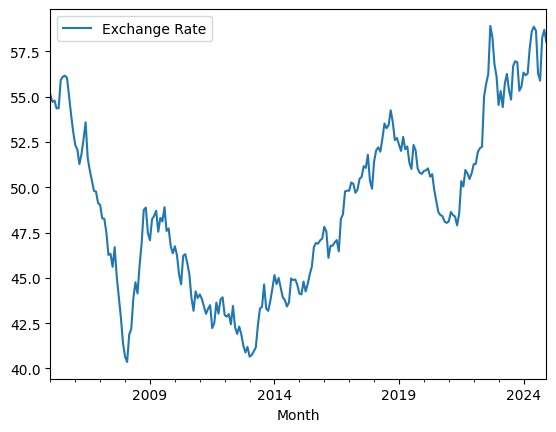

In [47]:
import pandas as pd
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error as MSE
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error  as MAE


df = pd.read_excel("exchange_rate.xlsx",skiprows=727,usecols="C,E",header=None, sheet_name="monthly", names=["Month", "Exchange Rate"],nrows=967-727)
df.head()

counter = iter(range(len(df["Month"])))


df["Month"] = [pd.to_datetime(f"{2005 + (i // 12)}-{(i % 12) + 1}-01") for i, _ in enumerate(df["Month"])]
df.set_index("Month",inplace=True)
df = df.resample("MS").sum()
# df = df.iloc[12*4:12*12]
df.plot()

## ADF Stat

Data is not stationary

In [48]:
p = adfuller(df["Exchange Rate"])[1]
print(f"ADF P-Value is: {p} < 0.05 ({p < 0.05})")

ADF P-Value is: 0.7675021143662771 < 0.05 (False)


Data is now stationary after d=1

In [49]:
df["Exchange Rate_diff"] = df["Exchange Rate"].diff()
df.dropna(inplace=True)

p = adfuller(df["Exchange Rate_diff"])[1]
print(f"ADF P-Value is: {p} < 0.05 ({p < 0.05})")

ADF P-Value is: 5.256321288435156e-26 < 0.05 (True)


## Splitting Data Set to 80/20 

In [50]:
n = int(len(df) * .8)
train = df.iloc[0:n]
test = df.iloc[n:len(df)]
print(f"Total: {len(df)}, Train: {len(train)}, Test: {len(test)}")

Total: 239, Train: 191, Test: 48


### Plotting ACF, PACF

No lag value outside blue region for both

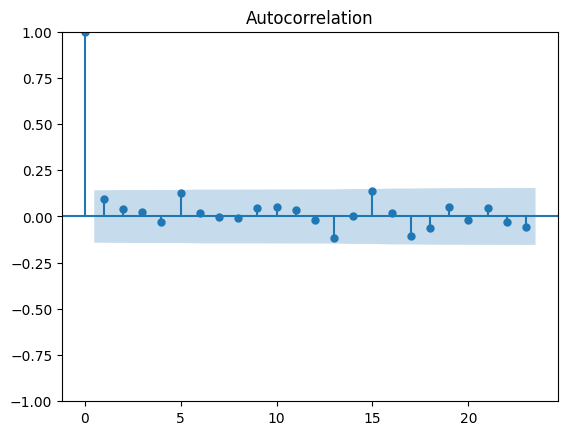

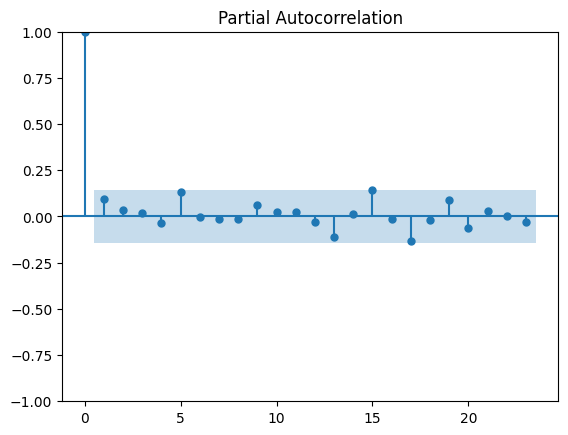

In [51]:
acf = plot_acf(train["Exchange Rate_diff"])
pacf = plot_pacf(train["Exchange Rate_diff"])

### Trying autoarima
Gets (0,1,0)

In [52]:
auto_arima(train["Exchange Rate"])

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\d

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

### ARIMA(0,1,0) Metric on Train Set

<Axes: xlabel='Month'>

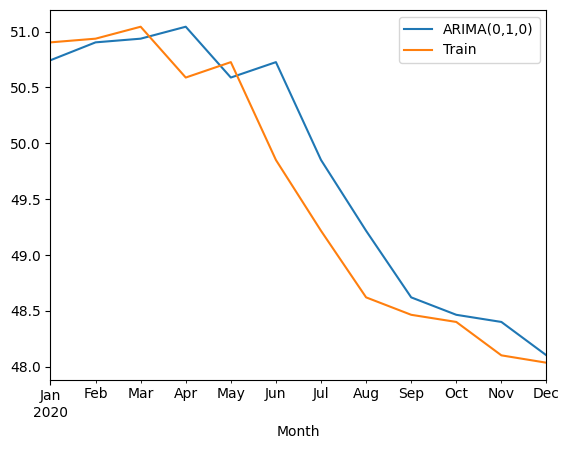

In [53]:
model = ARIMA(train["Exchange Rate"], order=(0,1,0)).fit()

model.fittedvalues.iloc[-12:].plot(legend=True,label="ARIMA(0,1,0)")
train["Exchange Rate"].iloc[-12:].plot(legend=True,label="Train")

<Axes: xlabel='Month'>

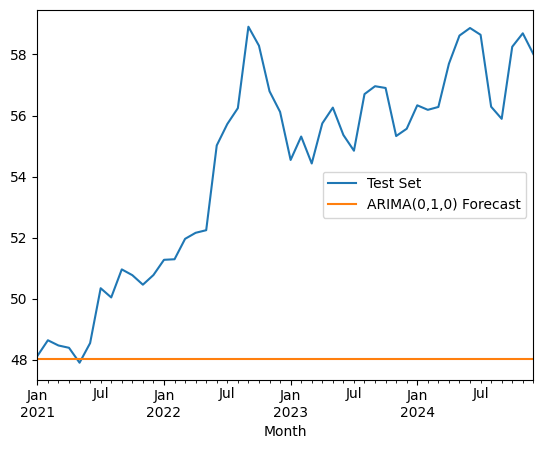

In [54]:
forecasted = model.forecast(len(test)).rename("ARIMA(0,1,0) Forecast")
test["Exchange Rate"].plot(legend=True,label="Test Set")
forecasted.plot(legend=True)

In [55]:
print(f"MAE: {MAE(test["Exchange Rate"], forecasted)}")

MAE: 6.285479166666666


## ARIMA Forecasting

<Axes: xlabel='Month'>

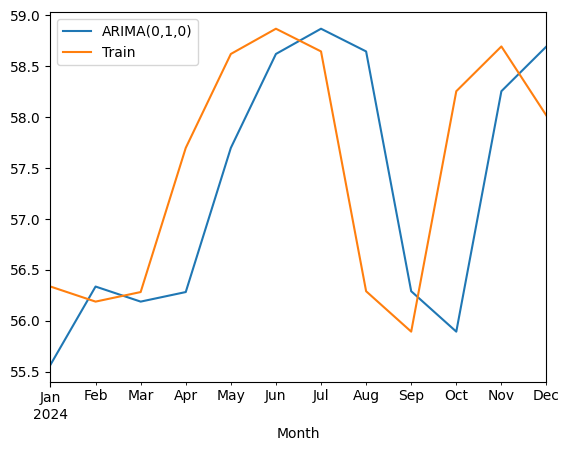

In [56]:
model = ARIMA(df["Exchange Rate"], order=(0,1,0)).fit()

model.fittedvalues.iloc[-12:].plot(legend=True,label="ARIMA(0,1,0)")
df["Exchange Rate"].iloc[-12:].plot(legend=True,label="Train")

<Axes: xlabel='Month'>

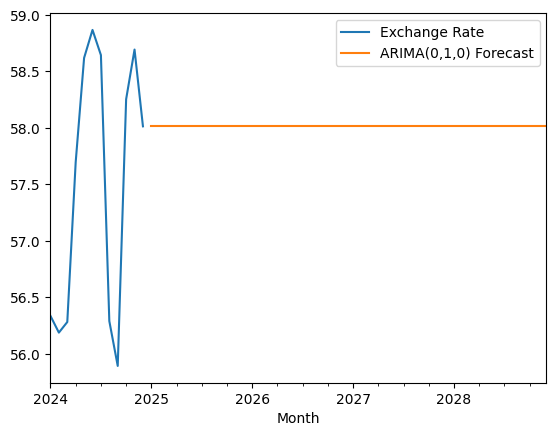

In [57]:
forecasted = model.forecast(len(test)).rename("ARIMA(0,1,0) Forecast")
df["Exchange Rate"].iloc[-12:].plot(legend=True,label="Exchange Rate")
forecasted.plot(legend=True)

In [58]:
forecasted.head()

2025-01-01    58.014
2025-02-01    58.014
2025-03-01    58.014
2025-04-01    58.014
2025-05-01    58.014
Freq: MS, Name: ARIMA(0,1,0) Forecast, dtype: float64